## The Copy-right of the data-set is from the

https://www.kaggle.com/c/titanic/data

# Importing Required Libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the Data-Sets

In [2]:
train = pd.read_csv(r"C:\Users\nalla\ML\Data-Sets\titanic\train.csv")
test= pd.read_csv(r"C:\Users\nalla\ML\Data-Sets\titanic\test.csv")

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Feature Engineering

## Checking null values

In [7]:
#sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#sns.heatmap(test.isnull(),yticklabels=False,cbar=False)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
#removing the un-neccasary columns
test_ID = test['PassengerId']
train=train.drop(columns=['PassengerId',"Ticket","Cabin"])
test=test.drop(columns=["PassengerId","Ticket","Cabin"])

In [10]:
train.shape

(891, 9)

# Handling Categorical Variables

In [11]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [12]:
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

In [13]:
train=train.drop(columns=["SibSp","Parch"])
test=test.drop(columns=["SibSp","Parch"])

In [14]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
train['Embarked'].fillna('S', inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [16]:
for dataset in [train,test]:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
# Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age']     = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 ;

In [17]:
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,1,7.2500,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,71.2833,C,2,0
2,1,3,"Heikkinen, Miss. Laina",female,1,7.9250,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,53.1000,S,2,0
4,0,3,"Allen, Mr. William Henry",male,2,8.0500,S,1,1


In [18]:
train.dtypes

Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int32
Fare          float64
Embarked       object
FamilySize      int64
IsAlone         int64
dtype: object

In [19]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
dtype: int64

In [20]:
train=train.drop(columns=["Name"])
test=test.drop(columns=["Name"])

In [21]:
train=pd.get_dummies(train,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

In [22]:
train.head()

,Survived,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,7.2500,2,0,1,0,1
1,1,1,2,71.2833,2,0,0,0,0
2,1,3,1,7.9250,1,1,0,0,1
3,1,1,2,53.1000,2,0,0,0,1
4,0,3,2,8.0500,1,1,1,0,1


In [23]:
train.dtypes

Survived        int64
Pclass          int64
Age             int32
Fare          float64
FamilySize      int64
IsAlone         int64
Sex_male        uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [24]:
test.dtypes

Pclass          int64
Age             int32
Fare          float64
FamilySize      int64
IsAlone         int64
Sex_male        uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

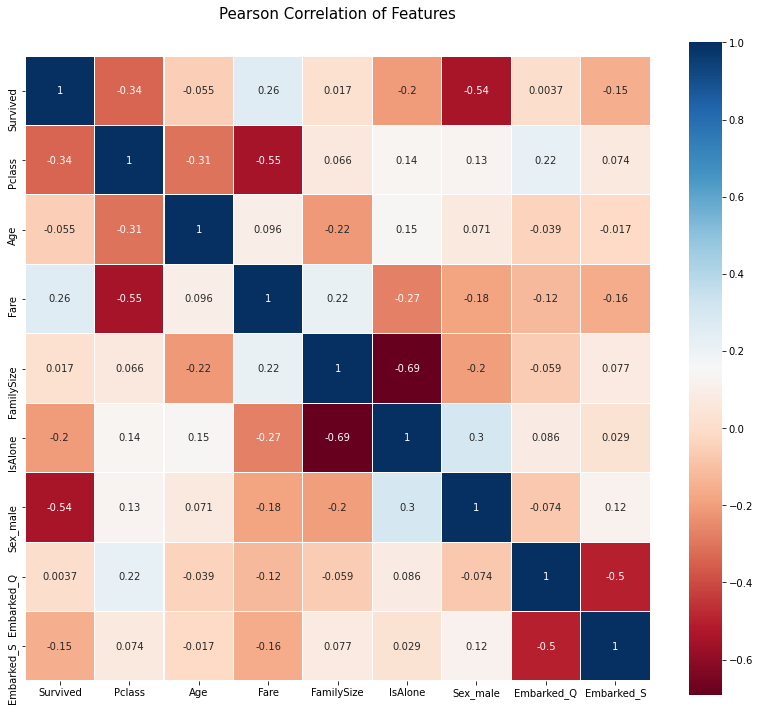

In [25]:
#checking co-realtion
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### Dependent and In-Dependent Variables

In [26]:
y=train.Survived
train=train.drop(columns=["Survived"])
all_data = pd.concat((train,test))

In [27]:
all_data.head()

,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,3,1,7.2500,2,0,1,0,1
1,1,2,71.2833,2,0,0,0,0
2,3,1,7.9250,1,1,0,0,1
3,1,2,53.1000,2,0,0,0,1
4,3,2,8.0500,1,1,1,0,1


In [28]:
all_data.shape

(1309, 8)

In [29]:
all_data.isnull().sum()

Pclass        0
Age           0
Fare          0
FamilySize    0
IsAlone       0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [30]:
all_data.isnull().sum()

Pclass        0
Age           0
Fare          0
FamilySize    0
IsAlone       0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [31]:
Ntrain = all_data[:train.shape[0]]
test = all_data[train.shape[0]:]

In [32]:
Ntrain.shape

(891, 8)

In [33]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
Ntrain = std_scaler.fit_transform(Ntrain)
test = std_scaler.transform(test)

In [34]:
test.shape

(418, 8)

## Using Cross-Validation To Evaluate Models

In [35]:
from sklearn.model_selection import cross_val_score
def cv(model,cv=10):
    cvx= np.sqrt(cross_val_score(model, Ntrain, y, scoring="accuracy", cv=10))
    return(cvx)

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
cv(log_classifier, cv=10).mean()

0.8951127495078703

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=0,max_depth=3)
cv(tree_clf,cv=10).mean()

0.8988510315899919

# RandomForest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=50,max_depth=3)
cv(rf_clf, cv=10).mean()

0.8956651390619378

# KNN

In [42]:
k=KNeighborsClassifier(n_neighbors=20)
cv(k).mean()

0.9000458094685891

# SVM

In [43]:
from sklearn.svm import SVC
svm_clf =SVC()
cv(svm_clf, cv=10).mean()

0.9018962120700783

# Bagging Classifier

In [44]:
from sklearn.ensemble import BaggingClassifier
bag_clf=BaggingClassifier()
cv(bag_clf).mean()

0.8998794196751051

# AdaBoost

In [45]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(n_estimators=90)
cv(ada_clf,cv=10).mean()

0.8975349878443541

# Gradient Boost

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_features=2)
cv(gb,cv=10).mean()

0.9036767179802748

# XGBoost

In [47]:
import xgboost as xgb
xgb_cl= xgb.XGBClassifier(max_depth= 5,n_estimators= 50)
cv(xgb_cl,cv=10).mean()

0.9104915775197264

# Submission

In [48]:
sub = pd.DataFrame()
sub['PassengerId'] = test_ID

In [49]:
xgb_cl.fit(Ntrain,y)
ada_clf.fit(Ntrain,y)
gb.fit(Ntrain,y)
bag_clf.fit(Ntrain,y)
tree_clf.fit(Ntrain,y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [43]:
sub['Survived'] = (0.4*xgb_cl.predict(test)+0.3*gb.predict(test)+0.2*bag_clf.predict(test)+0.1*tree_clf.predict(test))
sub['Survived'] =sub['Survived'].apply(lambda f: 1 if f>=0.5 else 0)
sub.to_csv('ensble3.csv',index=False)

In [50]:
#ada_clf=0.78
sub['Survived'] =ada_clf.predict(test)
sub['Survived'] =sub['Survived'].apply(lambda f: 1 if f>=0.5 else 0)
sub.to_csv('e2.csv',index=False)